In [1]:
from urllib.request import urlopen
from IPython.display import SVG
import matplotlib.pyplot as plt
from rdkit import Chem
from tqdm import tqdm
import pandas as pd
import xlsxwriter
import argparse
import pickle
import numpy as np
import json

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import visualizer as visualizer
import utils as utils
import handle_network as hn
import fragmentation_py as fragmentation_py
import library_downloader as library_downloader
import SiteLocator as modSite
import alignment as alignment
from Compound_n import Compound

library ="GNPS-MSMLS"
if not os.path.exists( os.path.join("../data/libraries", library)):
    url = "https://gnps-external.ucsd.edu/gnpslibrary/" + library + ".json"
    location = "../data/libraries/" + library + "/"
    library_downloader.download(url, location, 0.5, 0.1)

with open(os.path.join("../data/libraries", library, "data_dict_filtered.pkl"), "rb") as f:
    data_dict_filtered = pickle.load(f)

# load matches
with open(os.path.join("../data/libraries", library, "matches.pkl"), "rb") as f:
    matches = pickle.load(f)

# load cachedStructures_filtered
with open(os.path.join("../data/libraries", library, "cachedStructures.pkl"), "rb") as f:
    cachedStructures_filtered = pickle.load(f)

In [2]:
usi = "mzspec:GNPS:GNPS-MSMLS:accession:CCMSLIB00005463556"

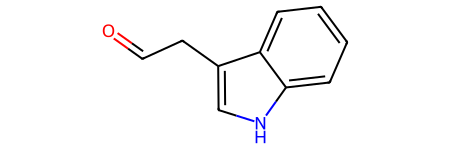

In [3]:
x = data_dict_filtered[usi.split(":")[-1]]
compound = Compound(x)
compound.structure


In [10]:
iceberg = json.load(open("./iceberg_output.json", "r"))
iceberg

[{'inchi': 'InChI=1S/C10H9NO/c12-6-5-8-7-11-10-4-2-1-3-9(8)10/h1-4,6-7,11H,5H2',
  'energy': 30,
  'smiles': 'O=CCc1c[nH]c2ccccc12',
  'precursor_mz': 160.075689908,
  'peaks': [{'mz': 160.07569036, 'i': 1.0, 'smiles': 'O=CCc1c[nH]c2ccccc12'},
   {'mz': 130.065125676,
    'i': 0.8428975871317668,
    'smiles': '[CH2]c1c[nH]c2ccccc12'},
   {'mz': 131.072950708,
    'i': 0.2214524013222812,
    'smiles': '[CH2]c1c[nH]c2ccccc12'},
   {'mz': 132.08077574,
    'i': 0.024320632135405917,
    'smiles': '[CH2]c1c[nH]c2ccccc12'},
   {'mz': 29.002191072, 'i': 0.00033152204206551313, 'smiles': '[CH]=O'},
   {'mz': 30.010016103999998, 'i': 0.00018751345408943212, 'smiles': '[CH]=O'},
   {'mz': 31.017841135999998, 'i': 0.00032745127827947285, 'smiles': '[CH]=O'},
   {'mz': 116.049475612,
    'i': 0.013396479225103668,
    'smiles': '[c]1c[nH]c2ccccc12'},
   {'mz': 117.057300644,
    'i': 0.05631792499910227,
    'smiles': '[c]1c[nH]c2ccccc12'},
   {'mz': 118.065125676,
    'i': 0.07853478039833044,

In [11]:
target = 72.081116

In [21]:
smiles = []
peaks = iceberg[0]["peaks"]
for peak in peaks:
    mz = float(peak["mz"])
    if abs(mz - target) < 0.1:
        smiles.append(peak["smiles"])

smiles
    

['[CH]C[C]=CN']

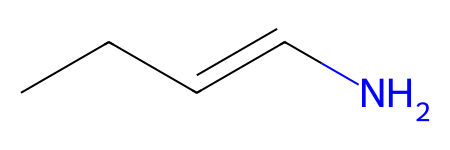

In [29]:
substruct = Chem.MolFromSmiles(smiles[0], sanitize=False)
substruct

In [30]:
compound.structure.HasSubstructMatch(substruct)

False

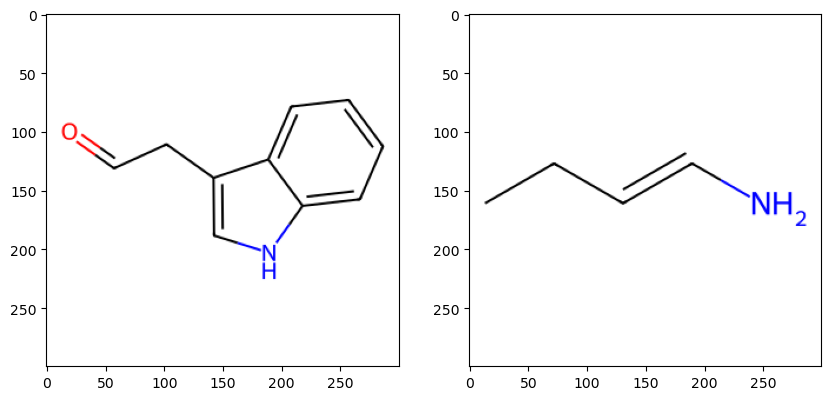

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(Chem.Draw.MolToImage(compound.structure))
ax[1].imshow(Chem.Draw.MolToImage(substruct))

In [33]:
#calculate mol weight
Chem.rdMolDescriptors.CalcExactMolWt(substruct)

68.050024192